In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

abandoned_carts_df = pd.read_parquet("Data/abandoned_carts.parquet")

print(abandoned_carts_df.shape)
print(abandoned_carts_df.head())
print(abandoned_carts_df.info())

(5457, 4)
                id                                            user_id  \
0   12858560217220  5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...   
13  20352449839236  9d6187545c005d39e44d0456d87790db18611d7c7379bd...   
45  20478401413252  e83fb0273d70c37a2968fee107113698fd4f389c442c0b...   
50  20481783103620  10c42e10e530284b7c7c50f3a23a98726d5747b8128084...   
52  20485321687172  d9989439524b3f6fc4f41686d043f315fb408b954d6153...   

            created_at                                         variant_id  
0  2020-05-20 13:53:24  [33826459287684, 33826457616516, 3366719212762...  
13 2021-06-27 05:24:13  [34415988179076, 34037940158596, 3450282236326...  
45 2021-07-18 08:23:49  [34543001337988, 34037939372164, 3411360609088...  
50 2021-07-18 21:29:36  [33667268116612, 34037940224132, 3443605520397...  
52 2021-07-19 12:17:05   [33667268083844, 34284950454404, 33973246886020]  
<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 70050
Data columns (total 4 col

In [18]:
inventory_df = pd.read_parquet("Data/inventory.parquet")

print(inventory_df.shape)
print(inventory_df.head())
print(inventory_df.info())

(1733, 6)
       variant_id  price  compare_at_price          vendor  \
0  39587297165444   3.09              3.15           heinz   
1  34370361229444   4.99              5.50   whogivesacrap   
2  34284951863428   3.69              3.99          plenty   
3  33667283583108   1.79              1.99  thecheekypanda   
4  33803537973380   1.99              2.09         colgate   

                      product_type                                        tags  
0             condiments-dressings                       [table-sauces, vegan]  
1  toilet-roll-kitchen-roll-tissue                 [b-corp, eco, toilet-rolls]  
2  toilet-roll-kitchen-roll-tissue                              [kitchen-roll]  
3  toilet-roll-kitchen-roll-tissue  [b-corp, cruelty-free, eco, tissue, vegan]  
4                           dental                        [dental-accessories]  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            No

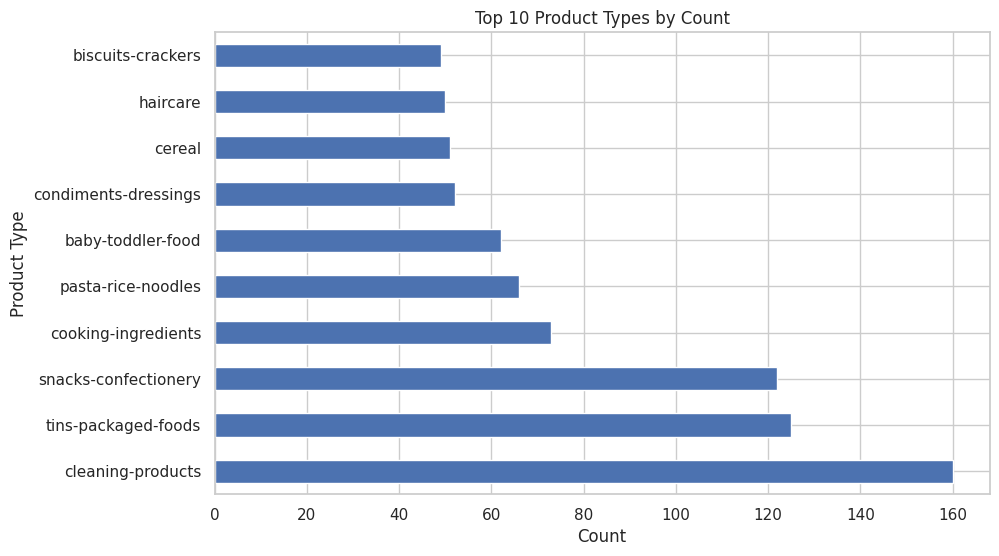

In [19]:
product_type_counts = inventory_df["product_type"].value_counts()
product_type_counts.head(10).plot(kind="barh", figsize=(10, 6))
plt.title("Top 10 Product Types by Count")
plt.xlabel("Count")
plt.ylabel("Product Type")
plt.show()

In [20]:
orders_df = pd.read_parquet("Data/orders.parquet")

print(orders_df.shape)
print(orders_df.head())
print(orders_df.info())

(8773, 6)
               id                                            user_id  \
10  2204073066628  62e271062eb827e411bd73941178d29b022f5f2de9d37f...   
20  2204707520644  bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...   
21  2204838822020  329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...   
34  2208967852164  f6451fce7b1c58d0effbe37fcb4e67b718193562766470...   
49  2215889436804  68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...   

            created_at order_date  user_order_seq  \
10 2020-04-30 14:32:19 2020-04-30               1   
20 2020-04-30 17:39:00 2020-04-30               1   
21 2020-04-30 18:12:30 2020-04-30               1   
34 2020-05-01 19:44:11 2020-05-01               1   
49 2020-05-03 21:56:14 2020-05-03               1   

                                        ordered_items  
10  [33618849693828, 33618860179588, 3361887404045...  
20  [33618835243140, 33618835964036, 3361886244058...  
21  [33618891145348, 33618893570180, 3361889766618...  
34  [336188301

In [21]:
orders_exploded = orders_df.explode("ordered_items")
orders_exploded["ordered_items"] = orders_exploded["ordered_items"].astype(int)

inventory_df = inventory_df.rename(columns={"variant_id": "ordered_items"})

merged_df = orders_exploded.join(
    inventory_df.set_index("ordered_items"), on="ordered_items"
)

print(merged_df.head())

merged_df_no_duplicates = merged_df.drop_duplicates(subset=["id", "product_type"])

top_ordered_products = merged_df_no_duplicates["product_type"].value_counts()

print(top_ordered_products)

               id                                            user_id  \
10  2204073066628  62e271062eb827e411bd73941178d29b022f5f2de9d37f...   
10  2204073066628  62e271062eb827e411bd73941178d29b022f5f2de9d37f...   
10  2204073066628  62e271062eb827e411bd73941178d29b022f5f2de9d37f...   
10  2204073066628  62e271062eb827e411bd73941178d29b022f5f2de9d37f...   
10  2204073066628  62e271062eb827e411bd73941178d29b022f5f2de9d37f...   

            created_at order_date  user_order_seq   ordered_items  price  \
10 2020-04-30 14:32:19 2020-04-30               1  33618849693828    NaN   
10 2020-04-30 14:32:19 2020-04-30               1  33618860179588    NaN   
10 2020-04-30 14:32:19 2020-04-30               1  33618874040452    NaN   
10 2020-04-30 14:32:19 2020-04-30               1  33618907005060    NaN   
10 2020-04-30 14:32:19 2020-04-30               1  33618907005060    NaN   

    compare_at_price vendor product_type tags  
10               NaN    NaN          NaN  NaN  
10            

En las órdenes no queda claro cuáles son los productos más vendidos, por lo que he decidido realizar un join entre las órdenes y el inventario. De esta forma, es posible identificar con mayor precisión los productos más vendidos. Al hacer el join, se puede observar que algunas columnas del dataframe de inventario contienen valores NaN, lo que indica que hay órdenes cuyos productos no están presentes en el inventario.

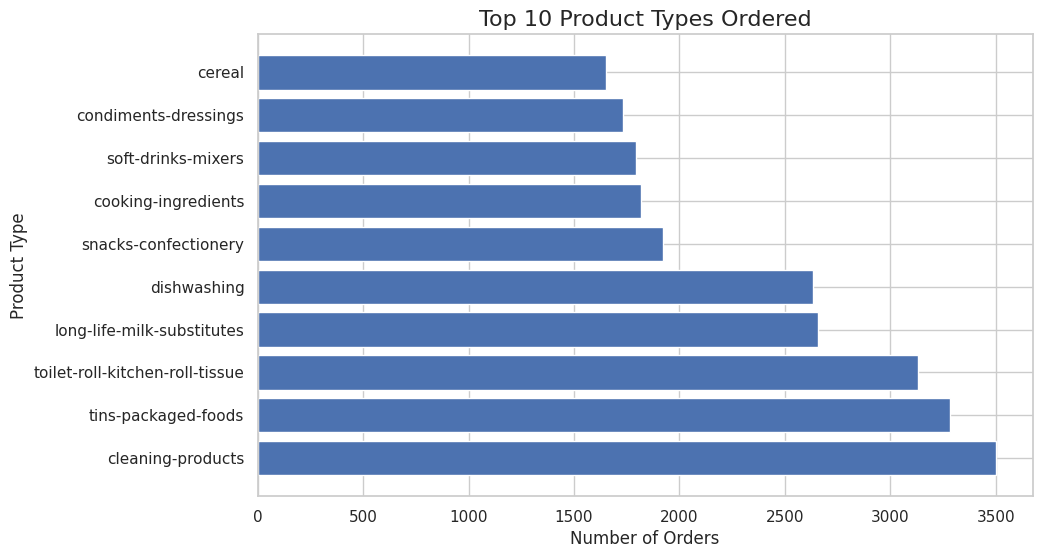

In [22]:
plt.figure(figsize=(10, 6))
plt.barh(top_ordered_products.head(10).index, top_ordered_products.head(10).values)

plt.title("Top 10 Product Types Ordered", fontsize=16)
plt.xlabel("Number of Orders", fontsize=12)
plt.ylabel("Product Type", fontsize=12)

plt.show()

In [23]:
merged_df_no_duplicates = merged_df.drop_duplicates(subset=["id", "product_type"])

top_ordered_products = merged_df_no_duplicates["vendor"].value_counts()

In [24]:
regulars_df = pd.read_parquet("Data/regulars.parquet")

print(regulars_df.shape)
print(regulars_df.head())
print(regulars_df.info())

(18105, 3)
                                              user_id      variant_id  \
3   68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...  33618848088196   
11  aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...  33667178659972   
18  68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...  33619009208452   
46  aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...  33667305373828   
47  4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...  33667247341700   

            created_at  
3  2020-04-30 15:07:03  
11 2020-05-05 23:34:35  
18 2020-04-30 15:07:03  
46 2020-05-05 23:34:35  
47 2020-05-06 14:42:11  
<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 3 to 37720
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18105 non-null  object        
 1   variant_id  18105 non-null  int64         
 2   created_at  18105 non-null  datetime64[us]
dtypes: datetime64[us](1), int64(1), object(1)
memory usa

In [25]:
inventory_df = pd.read_parquet("Data/inventory.parquet")

regulars_with_product_type_df = regulars_df.join(
    inventory_df.set_index("variant_id"), on="variant_id", how="left"
).dropna()

top_product_type = regulars_with_product_type_df["product_type"].value_counts()

print(top_product_type.head(5))

product_type
cleaning-products                  1877
tins-packaged-foods                1402
dishwashing                         834
toilet-roll-kitchen-roll-tissue     802
cooking-ingredients                 784
Name: count, dtype: int64


In [26]:
top_vendor = regulars_with_product_type_df["vendor"].value_counts()
print(top_vendor.head(5))

vendor
ecover    837
method    708
biona     659
oatly     356
fairy     308
Name: count, dtype: int64


In [27]:
regulars_with_product_type_df = regulars_df.join(
    inventory_df.set_index("variant_id"), on="variant_id", how="left"
).dropna()

top_saved_variants = regulars_with_product_type_df.groupby("variant_id")[
    "user_id"
].nunique()

top_saved_variants = top_saved_variants.sort_values(ascending=False)

print(top_saved_variants.head(5))

variant_id
34081589887108    207
34284951863428     78
33667282436228     78
34370915041412     77
34370361229444     74
Name: user_id, dtype: int64


In [28]:
most_wanted = top_saved_variants.index[0]

product = inventory_df[inventory_df["variant_id"] == most_wanted]
print(product)

        variant_id  price  compare_at_price vendor  \
63  34081589887108  10.79             11.94  oatly   

                  product_type               tags  
63  long-life-milk-substitutes  [oat-milk, vegan]  


In [29]:
users_df = pd.read_parquet("Data/users.parquet")

print(users_df.shape)
print(users_df.head())
print(users_df.info())

(4983, 10)
                                                user_id user_segment  \
2160  0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...       Top Up   
1123  15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...       Top Up   
1958  33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...       Top Up   
675   57ca7591dc79825df0cecc4836a58e6062454555c86c35...       Top Up   
4694  085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...       Top Up   

     user_nuts1     first_ordered_at customer_cohort_month  count_people  \
2160        UKH  2021-05-08 13:33:49   2021-05-01 00:00:00           NaN   
1123        UKJ  2021-11-17 16:30:20   2021-11-01 00:00:00           NaN   
1958        UKD  2022-03-09 23:12:25   2022-03-01 00:00:00           NaN   
675         UKI  2021-04-23 16:29:02   2021-04-01 00:00:00           NaN   
4694        UKJ  2021-11-02 13:50:06   2021-11-01 00:00:00           NaN   

      count_adults  count_children  count_babies  count_pets  
2160           NaN             NaN  

Podemos ver las columnas count_ tiene una gran mayoría de nulls, esto se puede deber a muchos motivos, uno de ellos puede ser que los usuarios al rellenar los datos no rellenen esos apartados ya que puede que no sea obligatorio.

In [30]:
user_nuts1 = users_df.groupby("user_nuts1")["user_id"].nunique()
user_nuts1 = user_nuts1.sort_values(ascending=False)
print(user_nuts1.head(5))

user_nuts1
UKI    1318
UKJ     745
UKK     602
UKH     414
UKD     358
Name: user_id, dtype: int64


In [31]:
users_no_null = users_df.dropna()
print(users_no_null.describe())

       count_people  count_adults  count_children  count_babies  count_pets
count    323.000000    323.000000      323.000000    323.000000  323.000000
mean       2.773994      1.987616        0.708978      0.077399    0.634675
std        1.356491      0.841380        1.028543      0.289919    0.995162
min        0.000000      0.000000        0.000000      0.000000    0.000000
25%        2.000000      2.000000        0.000000      0.000000    0.000000
50%        3.000000      2.000000        0.000000      0.000000    0.000000
75%        4.000000      2.000000        1.000000      0.000000    1.000000
max        8.000000      7.000000        6.000000      2.000000    6.000000


De esta información se puede ver que el 75% de los usuarios tienen como máximo 4 personas, mientras que el 25% restante tiene más de 4 personas, llegando hasta un máximo de 8.

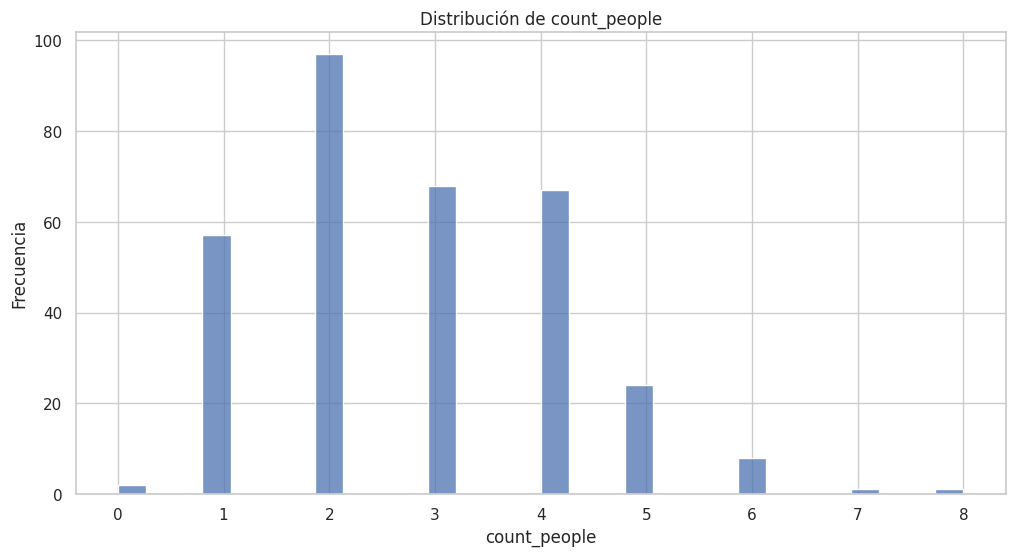

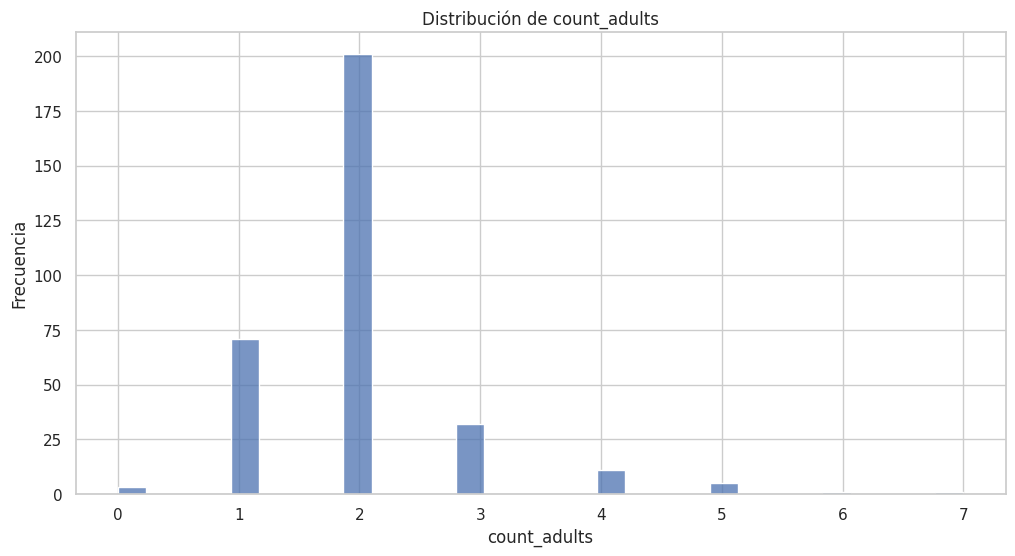

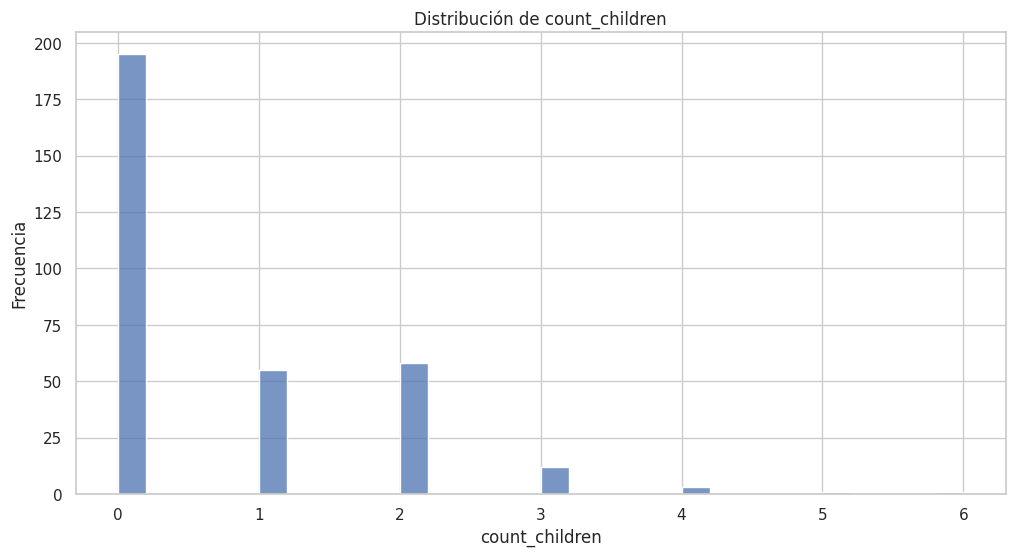

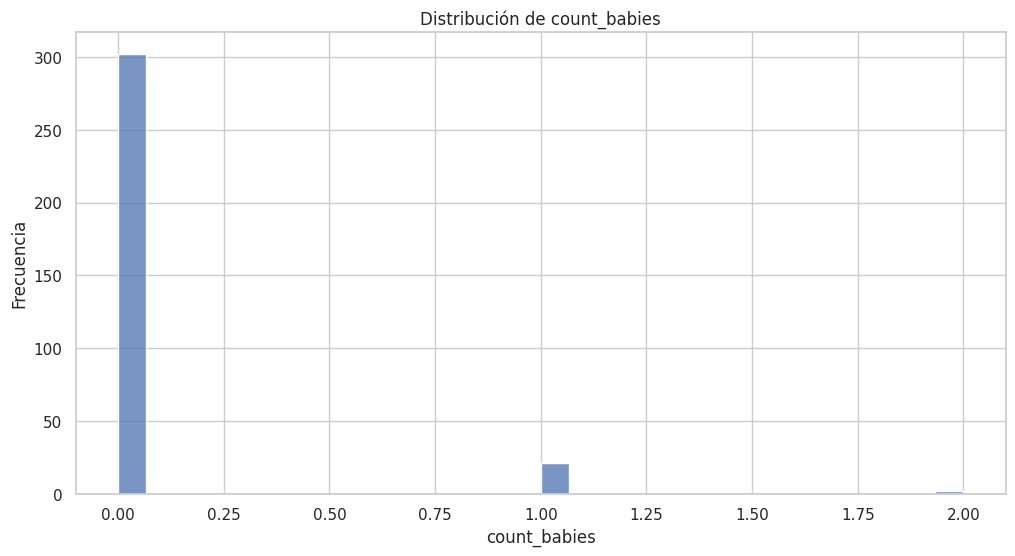

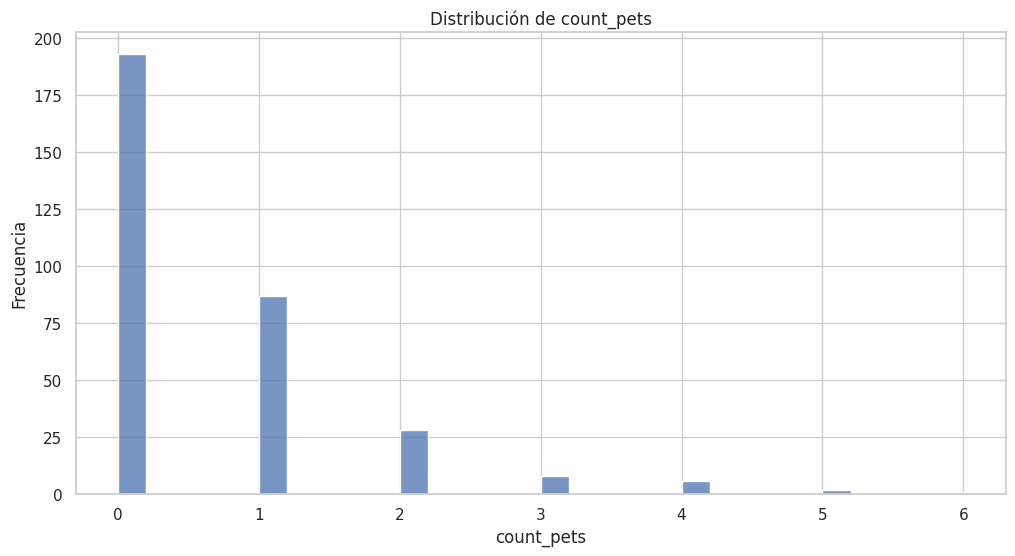

In [32]:
sns.set_theme(style="whitegrid")
column_to_analyze = [
    "count_people",
    "count_adults",
    "count_children",
    "count_babies",
    "count_pets",
]
for column in column_to_analyze:
    plt.figure(figsize=(12, 6))
    sns.histplot(users_df[column], bins=30)
    plt.title(f"Distribución de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.show()

De estos gráficos se puede destacar una parte importante de los usuarios tienen niños y mascotas.